# Feature Scaling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loaded the previous outlier free dataset which i made in the previous notebook**

In [3]:
df = pd.read_csv("wines_SPA_outliers_free.csv")
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Pago de Carraovejas,El Anejon,2016.0,4.8,454,Ribera del Duero,105.15,Ribera Del Duero Red,5.0,3.0
1,Vega Sicilia,Valbuena 5o,2016.0,4.7,2177,Ribera del Duero,107.57,Ribera Del Duero Red,5.0,3.0
2,Pago de Carraovejas,Cuesta de Las Liebres,2014.0,4.7,685,Ribera del Duero,113.18,Ribera Del Duero Red,5.0,3.0
3,Pago de Carraovejas,El Anejon,2015.0,4.7,543,Ribera del Duero,75.10,Ribera Del Duero Red,5.0,3.0
4,Bodegas El Nido,El Nido,2008.0,4.7,347,Jumilla,134.19,Red,4.0,3.0


**Getting basic info that which column is of int type**

**As that would be necessary as scaling can be applied to integer types columns**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1221 non-null   object 
 1   wine         1221 non-null   object 
 2   year         1221 non-null   float64
 3   rating       1221 non-null   float64
 4   num_reviews  1221 non-null   int64  
 5   region       1221 non-null   object 
 6   price        1221 non-null   float64
 7   type         1221 non-null   object 
 8   body         1221 non-null   float64
 9   acidity      1221 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 95.5+ KB


In [6]:
df.describe()

,year,rating,num_reviews,price,body,acidity
count,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,2013.016653,4.386077,515.099099,60.642125,4.212625,2.936962
std,5.996363,0.115245,987.115655,27.640179,0.607343,0.271044
min,1964.000000,4.200000,25.000000,28.000000,2.000000,1.000000
25%,2011.000000,4.300000,59.000000,37.600000,4.000000,3.000000
50%,2015.000000,4.400000,144.000000,53.900000,4.000000,3.000000
75%,2017.000000,4.500000,480.000000,76.800000,5.000000,3.000000
max,2020.000000,4.800000,7529.000000,139.900000,5.000000,3.000000


**Making an array of columns of int datatype so that in future graphs can be made from it**

In [7]:
num_columns = df.drop(['winery', 'wine', 'region', 'type'], axis="columns")
num_columns

,year,rating,num_reviews,price,body,acidity
0,2016.0,4.8,454,105.15,5.000000,3.000000
1,2016.0,4.7,2177,107.57,5.000000,3.000000
2,2014.0,4.7,685,113.18,5.000000,3.000000
3,2015.0,4.7,543,75.10,5.000000,3.000000
4,2008.0,4.7,347,134.19,4.000000,3.000000
...,...,...,...,...,...,...
1216,2011.0,4.2,395,61.94,4.000000,3.000000
1217,2011.0,4.2,389,64.50,5.000000,3.000000
1218,2016.0,4.2,388,31.63,5.000000,3.000000
1219,2005.0,4.2,384,73.00,4.000000,3.000000


**Making plots to know for which column to apply which scaling technique on which column**

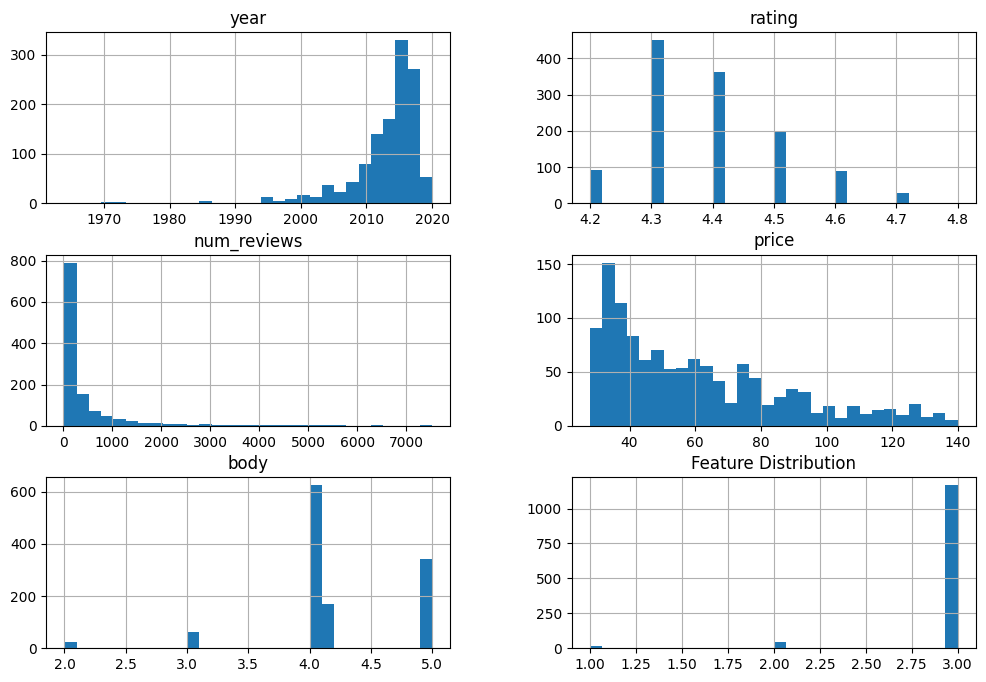

In [9]:
num_columns.hist(figsize=(12, 8), bins = 30)
plt.title("Feature Distribution")
plt.show()

*I Just made this Heatmap for fun and to make this notebook look good*

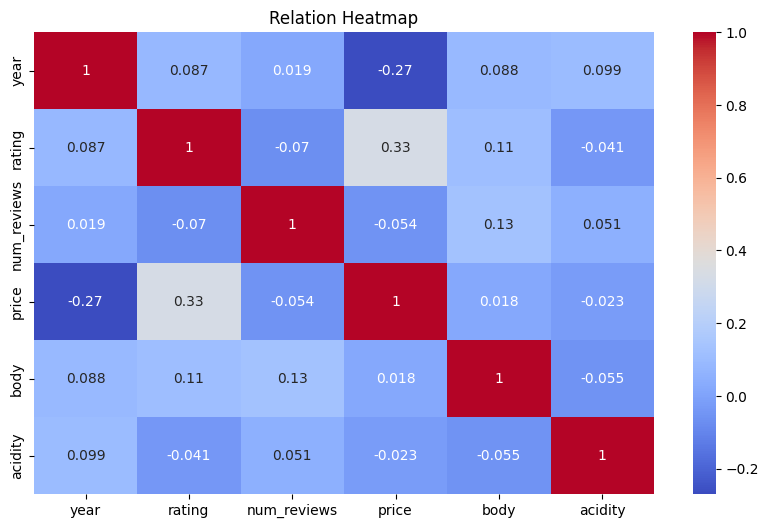

In [22]:
plt.figure(figsize=(10, 6))

sns.heatmap(num_columns.corr(), annot=True, cmap="coolwarm")
plt.title("Relation Heatmap")
plt.show()

**The columns for which Standard Scaling is applied**

In [11]:
stands_cols = ["year", "rating", "body", "acidity"]

**Applying Standard Scaling on year, rating, body and acidity**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[stands_cols] = scaler.fit_transform(df[stands_cols])

**The result columns after applying scaling**

In [14]:
df[stands_cols]

,year,rating,body,acidity
0,0.497730,3.593152,1.296956,0.232670
1,0.497730,2.725079,1.296956,0.232670
2,0.164058,2.725079,1.296956,0.232670
3,0.330894,2.725079,1.296956,0.232670
4,-0.836959,2.725079,-0.350235,0.232670
...,...,...,...,...
1216,-0.336450,-1.615283,-0.350235,0.232670
1217,-0.336450,-1.615283,1.296956,0.232670
1218,0.497730,-1.615283,1.296956,0.232670
1219,-1.337467,-1.615283,-0.350235,0.232670


**I added num-reviews and price column for minmax_scaling**

In [15]:
normal_cols = ['num_reviews', 'price']

**Applying Min_Max_scaling**

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[normal_cols] = scaler.fit_transform(df[normal_cols])

**Seeing the columns after applying the min_max_scaling on it**

In [17]:
df[normal_cols]

,num_reviews,price
0,0.057170,0.689455
1,0.286780,0.711081
2,0.087953,0.761215
3,0.069030,0.420912
4,0.042910,0.948972
...,...,...
1216,0.049307,0.303307
1217,0.048507,0.326184
1218,0.048374,0.032440
1219,0.047841,0.402145


In [19]:
df.sample(5)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
105,Huerta de Albala,Taberner No. 1,-0.002778,1.857007,0.000933,Cadiz,0.463807,Red,-0.350235,0.23267
191,Arzuaga,Gran Reserva Ribera del Duero,0.330894,0.988934,0.023987,Ribera del Duero,0.473458,Ribera Del Duero Red,1.296956,0.23267
756,Alvaro Palacios,Finca Dofi,-0.336450,-0.747211,0.078358,Priorato,0.464701,Priorat Red,-0.350235,0.23267
868,Martinet,Clos Martinet,-0.169614,-0.747211,0.020389,Priorato,0.798034,Priorat Red,-0.350235,0.23267
788,Remirez de Ganuza,Rioja Vina Coqueta,-0.836959,-0.747211,0.053838,Rioja,0.257018,Rioja Red,-0.350235,0.23267


In [20]:
df.to_csv('wines_SPA_scaled_dataset.csv', index = False)